In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from pmdarima.arima import auto_arima
import multiprocessing as mp
import saxpy
from saxpy.sax import sax_via_window
from saxpy.alphabet import cuts_for_asize
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string

df1 = pd.read_csv("data/BATADAL_dataset03.csv")
df2 = pd.read_csv("data/BATADAL_dataset04.csv")
df2.columns = df2.columns.str.replace(" ", "")
dftest = pd.read_csv("data/BATADAL_test_dataset.csv")

In [2]:
data = df2.drop("DATETIME",1)

dfy = df2["ATT_FLAG"]
dfy = dfy.replace(-999,0)
x = []
x = pd.DataFrame(x)
for index in range(0,len(data.columns)):
    indexname = "{}".format(data.columns[index])
    dat = data[indexname].values
    amount_of_levels = 3
    window_size = 2

    discrete_signal = []
    for t in range(len(dat)-window_size):
        dat_znorm = znorm(dat[t:t+window_size])
        discrete_signal.append(ts_to_string(dat_znorm, cuts_for_asize(amount_of_levels)))

    x[indexname] = discrete_signal
saxxeddata = x   

In [3]:
saxxeddata = saxxeddata.drop("ATT_FLAG",1)

In [4]:
# saxxeddata["output"] = dfy


In [5]:
targets_for_onehot = saxxeddata.columns
new_df = pd.DataFrame([])

for target in targets_for_onehot:
    temp = pd.get_dummies(saxxeddata[target])
    new_df = pd.concat([new_df, temp],axis=1)



In [6]:
import torch
import torch.nn as nn

In [103]:
# dfy = df2["ATT_FLAG"]
# dfy = dfy.replace(-999,0)
from sklearn.model_selection import train_test_split
data= df2
datay = dfy
data = data.drop("DATETIME",axis=1)
data = data.drop("ATT_FLAG",axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(data, dfy, test_size = 0.2)
xTrain = torch.tensor(xTrain.values,dtype=torch.float)
yTrain = torch.tensor(yTrain.values,dtype=torch.float)
xTest = torch.tensor(xTest.values,dtype=torch.float)
yTest = torch.tensor(yTest.values,dtype=torch.float)


In [104]:

var = df2.drop(["DATETIME","ATT_FLAG"],axis=1).shape[1]
n_in, n_h, n_out, batch_size = var, 10, 1, 5

model = nn.Sequential(nn.Linear(n_in, n_h),
                     nn.ReLU(),
                     nn.Linear(n_h, n_out),
                     nn.Sigmoid())
criterion = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
lossgraph = []
testlossgraph=[]
for epoch in range(10):
    # Forward Propagation
    y_pred = model(xTrain)
    y_pred_test = model(xTest)
    # Compute and print loss
    loss = criterion(y_pred, yTrain)
    testloss = criterion(y_pred_test,yTest)
    print('Round: ', epoch,' train loss: ', loss.item())
    print("test loss: ", testloss.item())
    
    lossgraph.append(float(loss))
    testlossgraph.append(float(testloss))
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()

Round:  0  train loss:  0.2189032882452011
test loss:  0.21926997601985931
Round:  1  train loss:  0.12359146773815155
test loss:  0.11498633772134781
Round:  2  train loss:  0.06986894458532333
test loss:  0.05692698061466217
Round:  3  train loss:  0.055449772626161575
test loss:  0.039958275854587555
Round:  4  train loss:  0.05412160977721214
test loss:  0.037470970302820206
Round:  5  train loss:  0.05475955456495285
test loss:  0.03756330534815788
Round:  6  train loss:  0.05528135597705841
test loss:  0.03783866763114929
Round:  7  train loss:  0.05557859688997269
test loss:  0.03801970183849335
Round:  8  train loss:  0.05574033036828041
test loss:  0.03812336549162865
Round:  9  train loss:  0.05582984536886215
test loss:  0.03818216174840927


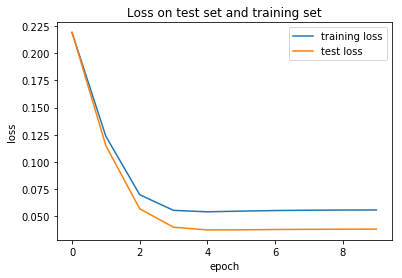

In [105]:
plt.plot(lossgraph,label="training loss")
plt.plot(testlossgraph,label="test loss")
plt.title("Loss on test set and training set")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [145]:
results= []
labels = []
for i in range(0,len(y_pred_test)):
    label = float(yTest[i])
    labels.append(label)
    prediction = float(y_pred_test[i])
    results.append(prediction)

In [146]:
results = pd.DataFrame(results)


In [147]:
results["labels"] = pd.DataFrame(labels)

In [150]:
results[results["labels"] ==1.0]

,0,labels
12,0.001498,1.0
19,0.007410,1.0
20,0.000680,1.0
55,0.001924,1.0
56,0.001175,1.0
78,0.000271,1.0
139,0.001701,1.0
157,0.001822,1.0
203,0.001731,1.0
206,0.000562,1.0
